### Book3 - logprobs

In [1]:
import ctypes
import json
from llama_cpp import llama_log_set
from llama_cpp import Llama

def my_log_callback(level, message, user_data):
    pass
log_callback = ctypes.CFUNCTYPE(None, ctypes.c_int, ctypes.c_char_p, ctypes.c_void_p)(my_log_callback)
llama_log_set(log_callback, ctypes.c_void_p())


In [2]:
model_fn = '/mnt/disk2/llamas/TheBloke7B/llama-2-7b.Q4_K_M.gguf'
llm = Llama(
    model_fn, 
    logits_all=True  # important: use at init for logprobs on inference
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Example of running the experiment
- low max_tokens
- high logprobs

In [52]:

num_logprobs =  40
model_params = {
    'temperature': 0.8,
    'max_tokens': 2,
}

# prompt = '''He opened up the door and saw a woman and her eyes were'''
# prompt = '''She was the most beautiful woman in the world. Her hair was brown and her eyes were'''
prompt = '''She was the most beautiful woman in the world. Her'''

prompt = prompt.rstrip() # don't leave a space at the end for llama tokenization's sake

output = llm(
    prompt=prompt, 
    logprobs=num_logprobs, 
    **model_params,
)


Llama.generate: prefix-match hit


In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [54]:
text            = output['choices'][0]['text']
top_logprobs    = output['choices'][0]['logprobs']['top_logprobs']



In [55]:
data = [(k,v) for k,v in top_logprobs[0].items()]
df = pd.DataFrame(data, columns=['token', 'logprob'])
df['prob'] = df['logprob'].apply(lambda x: np.e**x)
df['cum_prob'] = df['prob'].cumsum()


In [60]:
df.head(5)

,token,logprob,prob,cum_prob
0,name,-1.591667,0.203586,0.203586
1,skin,-2.104665,0.121886,0.325472
2,face,-2.815947,0.059848,0.385320
3,hair,-2.825720,0.059266,0.444586
4,eyes,-3.119368,0.044185,0.488771


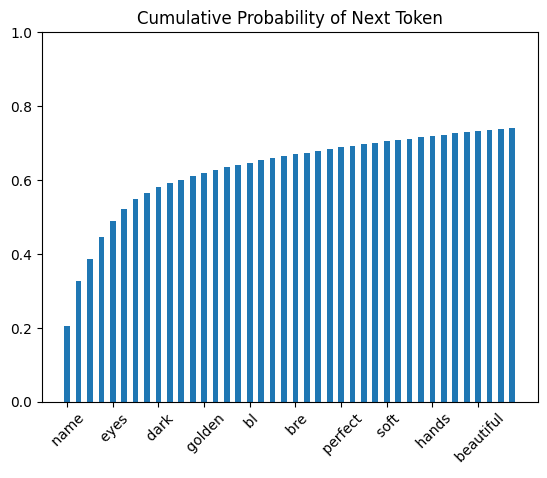

In [61]:
plt.bar(height=df['cum_prob'], x=df['token'], width=0.5);
# y-axis [0,1]
plt.ylim(0,1);
# rotate x-labels 45 degrees
plt.xticks(rotation=45);
# only display every 10th x-label
plt.xticks(np.arange(0, len(df['token']), 4));
plt.title('Cumulative Probability of Next Token');


In [59]:
df

,token,logprob,prob,cum_prob
0,name,-1.591667,0.203586,0.203586
1,skin,-2.104665,0.121886,0.325472
2,face,-2.815947,0.059848,0.385320
3,hair,-2.825720,0.059266,0.444586
4,eyes,-3.119368,0.044185,0.488771
5,long,-3.468268,0.031171,0.519942
6,beauty,-3.564661,0.028307,0.548249
7,body,-4.046119,0.017490,0.565739
8,dark,-4.269499,0.013989,0.579728
9,smile,-4.533859,0.010739,0.590467


In [7]:

# output